In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from feature_engine.imputation import CategoricalImputer

In [8]:
data = pd.read_csv("../houseprice.csv")

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Общая информация о доме

| Признак        | Значение                                                |
| -------------- | ------------------------------------------------------- |
| `Id`           | Уникальный идентификатор дома                           |
| `MSSubClass`   | Класс здания (по назначению) — числовой код типа жилища |
| `MSZoning`     | Зонирование (жилое, промышленное и т.п.)                |
| `LotFrontage`  | Ширина участка, примыкающего к улице (в футах)          |
| `LotArea`      | Площадь участка (в квадратных футах)                    |
| `Street`       | Тип дороги (асфальт, гравий)                            |
| `Alley`        | Тип переулка (если есть)                                |
| `LotShape`     | Форма участка (регулярный, трапеция и т.п.)             |
| `LandContour`  | Контур участка (ровный, скат и т.п.)                    |
| `Utilities`    | Коммуникации (вода, электричество)                      |
| `LotConfig`    | Конфигурация участка (угловой, внутри квартала и т.д.)  |
| `LandSlope`    | Уклон участка                                           |
| `Neighborhood` | Район (название)                                        |
| `Condition1/2` | Прилегающие объекты (дороги, железные дороги и пр.)     |

Тип дома и его конструкция

| Признак        | Значение                                         |
| -------------- | ------------------------------------------------ |
| `BldgType`     | Тип здания (отдельный дом, таунхаус и т.п.)      |
| `HouseStyle`   | Этажность/тип дома (1-этажный, 2-этажный и т.п.) |
| `OverallQual`  | Общая оценка качества (1–10)                     |
| `OverallCond`  | Общая оценка состояния (1–10)                    |
| `YearBuilt`    | Год постройки                                    |
| `YearRemodAdd` | Год последнего ремонта или реконструкции         |

Внешний вид и материалы

| Признак           | Значение                              |
| ----------------- | ------------------------------------- |
| `RoofStyle`       | Тип крыши                             |
| `RoofMatl`        | Материал крыши                        |
| `Exterior1st/2nd` | Наружная отделка (1-я и 2-я)          |
| `MasVnrType`      | Тип каменной/кирпичной отделки фасада |
| `MasVnrArea`      | Площадь этой отделки                  |
| `ExterQual`       | Качество внешней отделки              |
| `ExterCond`       | Состояние внешней отделки             |

Фундамент и подвал

| Признак          | Значение                                        |
| ---------------- | ----------------------------------------------- |
| `Foundation`     | Тип фундамента                                  |
| `BsmtQual`       | Качество подвала                                |
| `BsmtCond`       | Состояние подвала                               |
| `BsmtExposure`   | Наличие окон в подвале                          |
| `BsmtFinType1/2` | Тип отделки подвала (основной и дополнительный) |
| `BsmtFinSF1/2`   | Площадь отделанного подвала                     |
| `BsmtUnfSF`      | Площадь неотделанного подвала                   |
| `TotalBsmtSF`    | Общая площадь подвала                           |

Отопление и электроника

| Признак      | Значение                            |
| ------------ | ----------------------------------- |
| `Heating`    | Тип отопления                       |
| `HeatingQC`  | Качество системы отопления          |
| `CentralAir` | Центральное кондиционирование (Y/N) |
| `Electrical` | Тип электропроводки                 |

Жилая площадь и комнаты

| Признак                 | Значение                          |
| ----------------------- | --------------------------------- |
| `1stFlrSF/2ndFlrSF`     | Площадь 1-го и 2-го этажей        |
| `LowQualFinSF`          | Площадь низкокачественной отделки |
| `GrLivArea`             | Общая жилая площадь               |
| `BsmtFullBath/HalfBath` | Ванные комнаты в подвале          |
| `FullBath/HalfBath`     | Ванные комнаты выше уровня земли  |
| `BedroomAbvGr`          | Количество спален над землёй      |
| `KitchenAbvGr`          | Количество кухонь                 |
| `KitchenQual`           | Качество кухни                    |
| `TotRmsAbvGrd`          | Общее число комнат над землёй     |

Камины и функциональность

| Признак       | Значение                                                       |
| ------------- | -------------------------------------------------------------- |
| `Functional`  | Функциональность дома (нормально, минимальные проблемы и т.п.) |
| `Fireplaces`  | Количество каминов                                             |
| `FireplaceQu` | Качество камина                                                |

Гараж

| Признак        | Значение                                     |
| -------------- | -------------------------------------------- |
| `GarageType`   | Тип гаража (встроенный, пристроенный и т.п.) |
| `GarageYrBlt`  | Год постройки гаража                         |
| `GarageFinish` | Отделка внутренней части гаража              |
| `GarageCars`   | Количество машин, вмещающихся в гараж        |
| `GarageArea`   | Площадь гаража                               |
| `GarageQual`   | Качество гаража                              |
| `GarageCond`   | Состояние гаража                             |

Дополнительно

| Признак         | Значение                                  |
| --------------- | ----------------------------------------- |
| `PavedDrive`    | Асфальтирован ли подъезд                  |
| `WoodDeckSF`    | Площадь деревянной террасы                |
| `OpenPorchSF`   | Открытая веранда                          |
| `EnclosedPorch` | Закрытая веранда                          |
| `3SsnPorch`     | Трёхсезонная веранда                      |
| `ScreenPorch`   | Веранда с сеткой                          |
| `PoolArea`      | Площадь бассейна                          |
| `PoolQC`        | Качество бассейна                         |
| `Fence`         | Тип забора                                |
| `MiscFeature`   | Прочие особенности (теннис, сарай и т.п.) |
| `MiscVal`       | Стоимость прочих особенностей             |

Продажа

| Признак         | Значение                                     |
| --------------- | -------------------------------------------- |
| `MoSold`        | Месяц продажи                                |
| `YrSold`        | Год продажи                                  |
| `SaleType`      | Тип продажи (обычная, на аукционе и т.п.)    |
| `SaleCondition` | Условия продажи (обычная, наследство и т.п.) |
| `SalePrice`     | **Целевая переменная — цена продажи**        |

In [10]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [15]:
missing_percent = (data.isnull().sum() / len(data))
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64


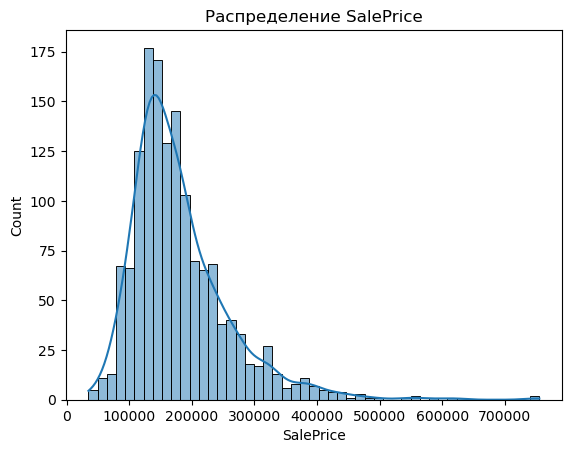

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
sns.histplot(data['SalePrice'], kde=True)
plt.title("Распределение SalePrice")
plt.show()

# Проверим распределение (насколько оно логнормальное)
data['SalePrice'].describe()

📊 Интерпретация
- Средняя цена (mean): ~$180,900.

- Медианная цена (50%): $163,000 — меньше среднего → распределение асимметрично вправо (есть дорогие дома).

- Стандартное отклонение (std): ~$79,400 — высокое, разброс цен значительный.

- Минимум / максимум: от $34,900  до  $755,000 — разброс почти в 22 раза, что говорит о наличии выбросов.

- 75% перцентиль (75%): $214,000 → 25% домов дороже этой суммы.

📌 Выводы:
- Распределение цен положительно скошено, что часто встречается в ценах на жильё. Это может мешать линейным моделям, т.к. они чувствительны к нормальности ошибок.

- 2 Логарифмирование SalePrice может помочь:

- 3 Выбросы стоит найти позже (например, дома с ценой > 600,000 могут оказаться выбросами для модели).

# ✅ Числовые признаки

In [19]:
num_features = data.select_dtypes(include=['int64', 'float64'])
print(num_features.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


# 📈 Корреляционная матрица с SalePrice

In [20]:
correlation = num_features.corr()
cor_target = correlation['SalePrice'].sort_values(ascending=False)
print(cor_target)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

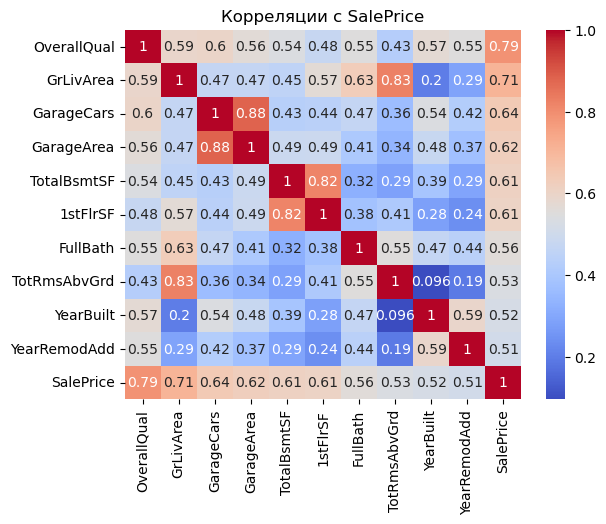

In [21]:
top_corr = cor_target.drop('SalePrice').head(10).index

sns.heatmap(data[top_corr.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Корреляции с SalePrice")
plt.show()

*Наибольшую корреляцию показывают:*

`OverallQual` — общее качество дома.

`GrLivArea` — жилая площадь над землёй.

`GarageCars` , `GarageArea` — информация о гараже.

`TotalBsmtSF` — площадь подвала.

`1stFlrSF` , `FullBath` , `YearBuilt` .

# ScatterPlot

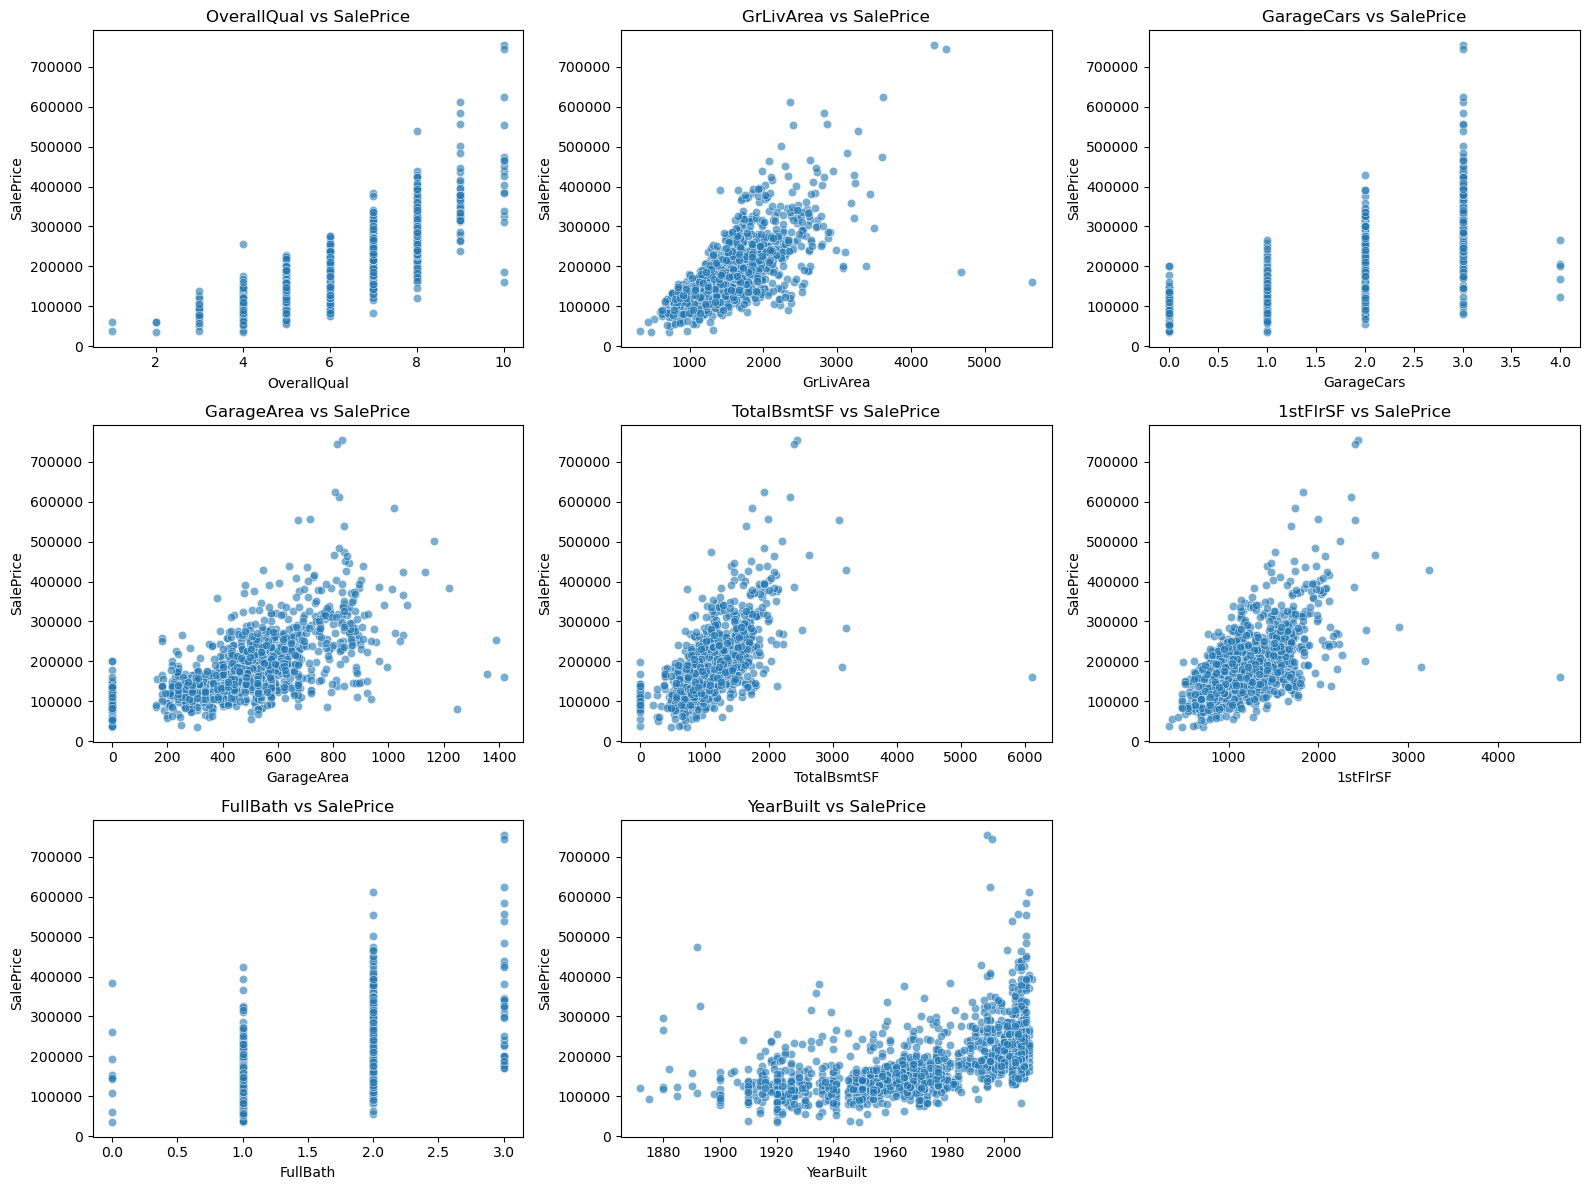

In [22]:
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(top_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=data, x=feature, y='SalePrice', alpha=0.6)
    plt.title(f'{feature} vs SalePrice')

plt.tight_layout()
plt.show()

🔍 *Вывод наблюдения:*
- Линейная зависимость: особенно у `GrLivArea` , `OverallQual` , `TotalBsmtSF` .

- Выбросы: например, огромная `GrLivArea` при низкой цене → возможно, аномалия.

- "Наслоение" значений: у категориальных числовых переменных, например `GarageCars`.

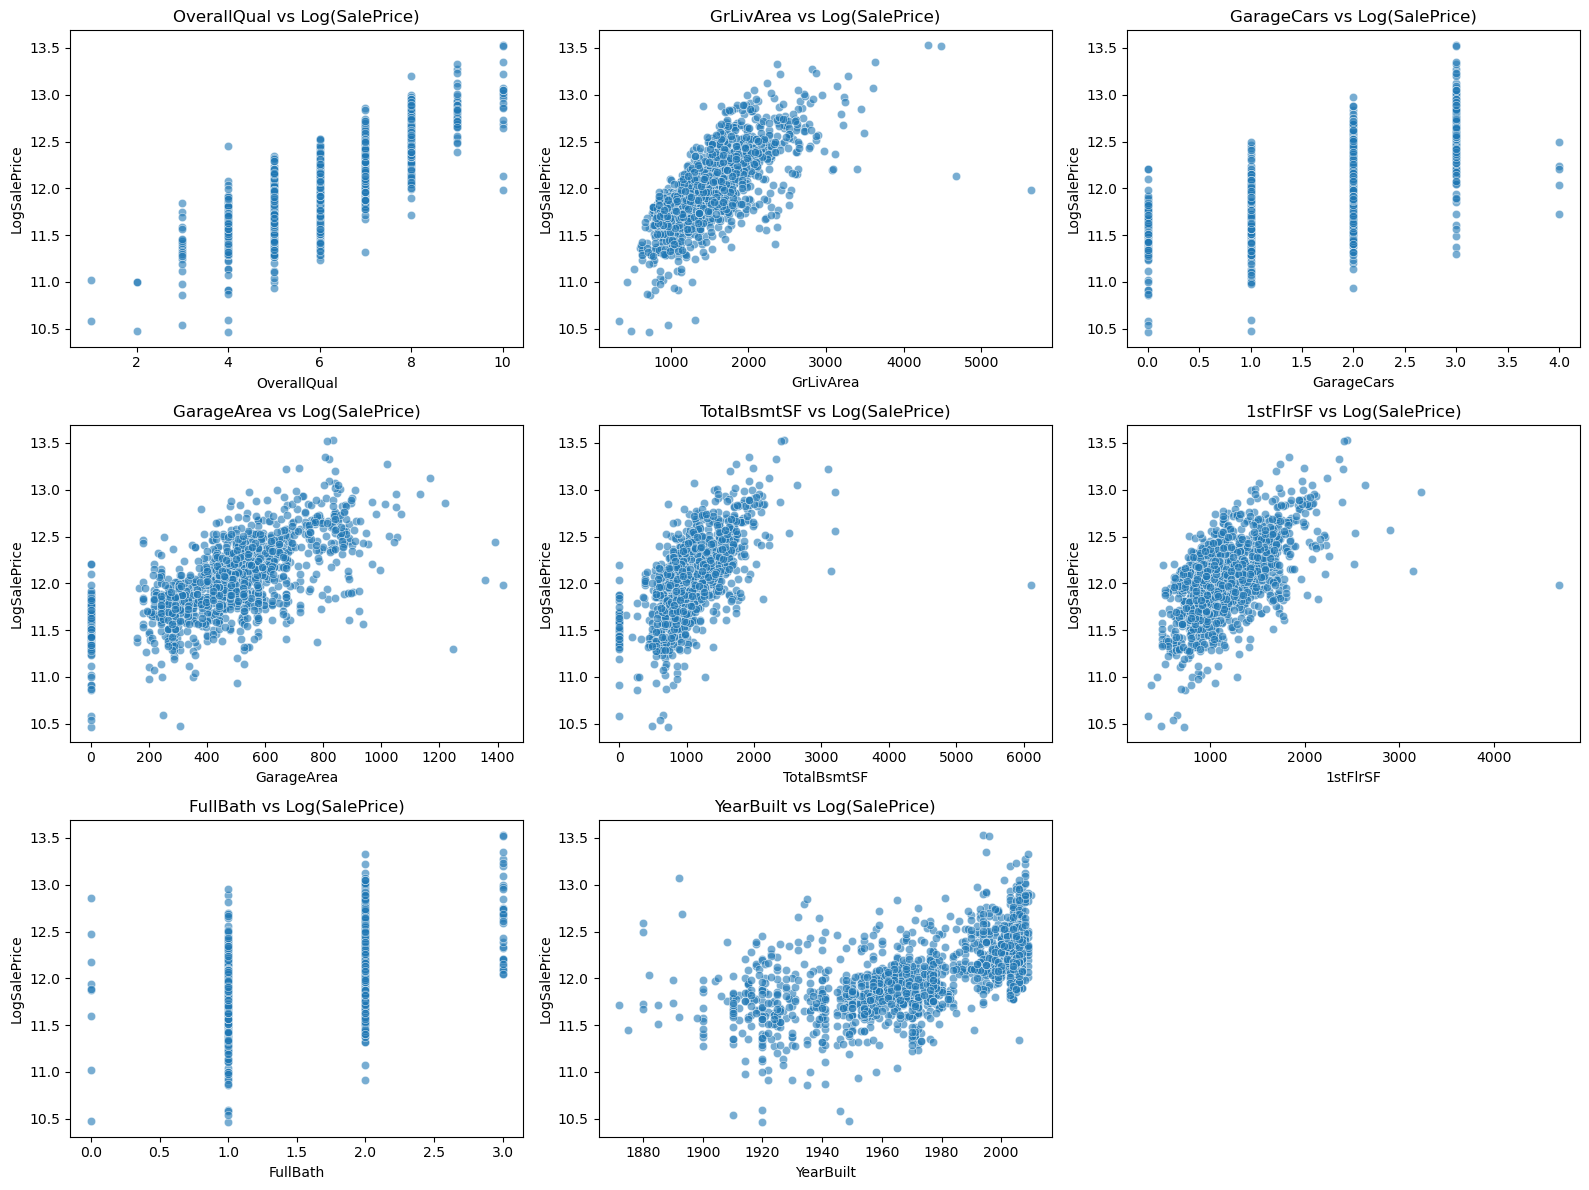

In [23]:
# Добавим логарифм цены, логарифмирование уменьшает влияние выбросов и делает распределения ближе к линейным — модели работают стабильнее.
data['LogSalePrice'] = np.log1p(data['SalePrice'])

top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(top_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=data, x=feature, y='LogSalePrice', alpha=0.6)
    plt.title(f'{feature} vs Log(SalePrice)')

plt.tight_layout()
plt.show()

# 📊 *Boxplot для категориальных признаков*

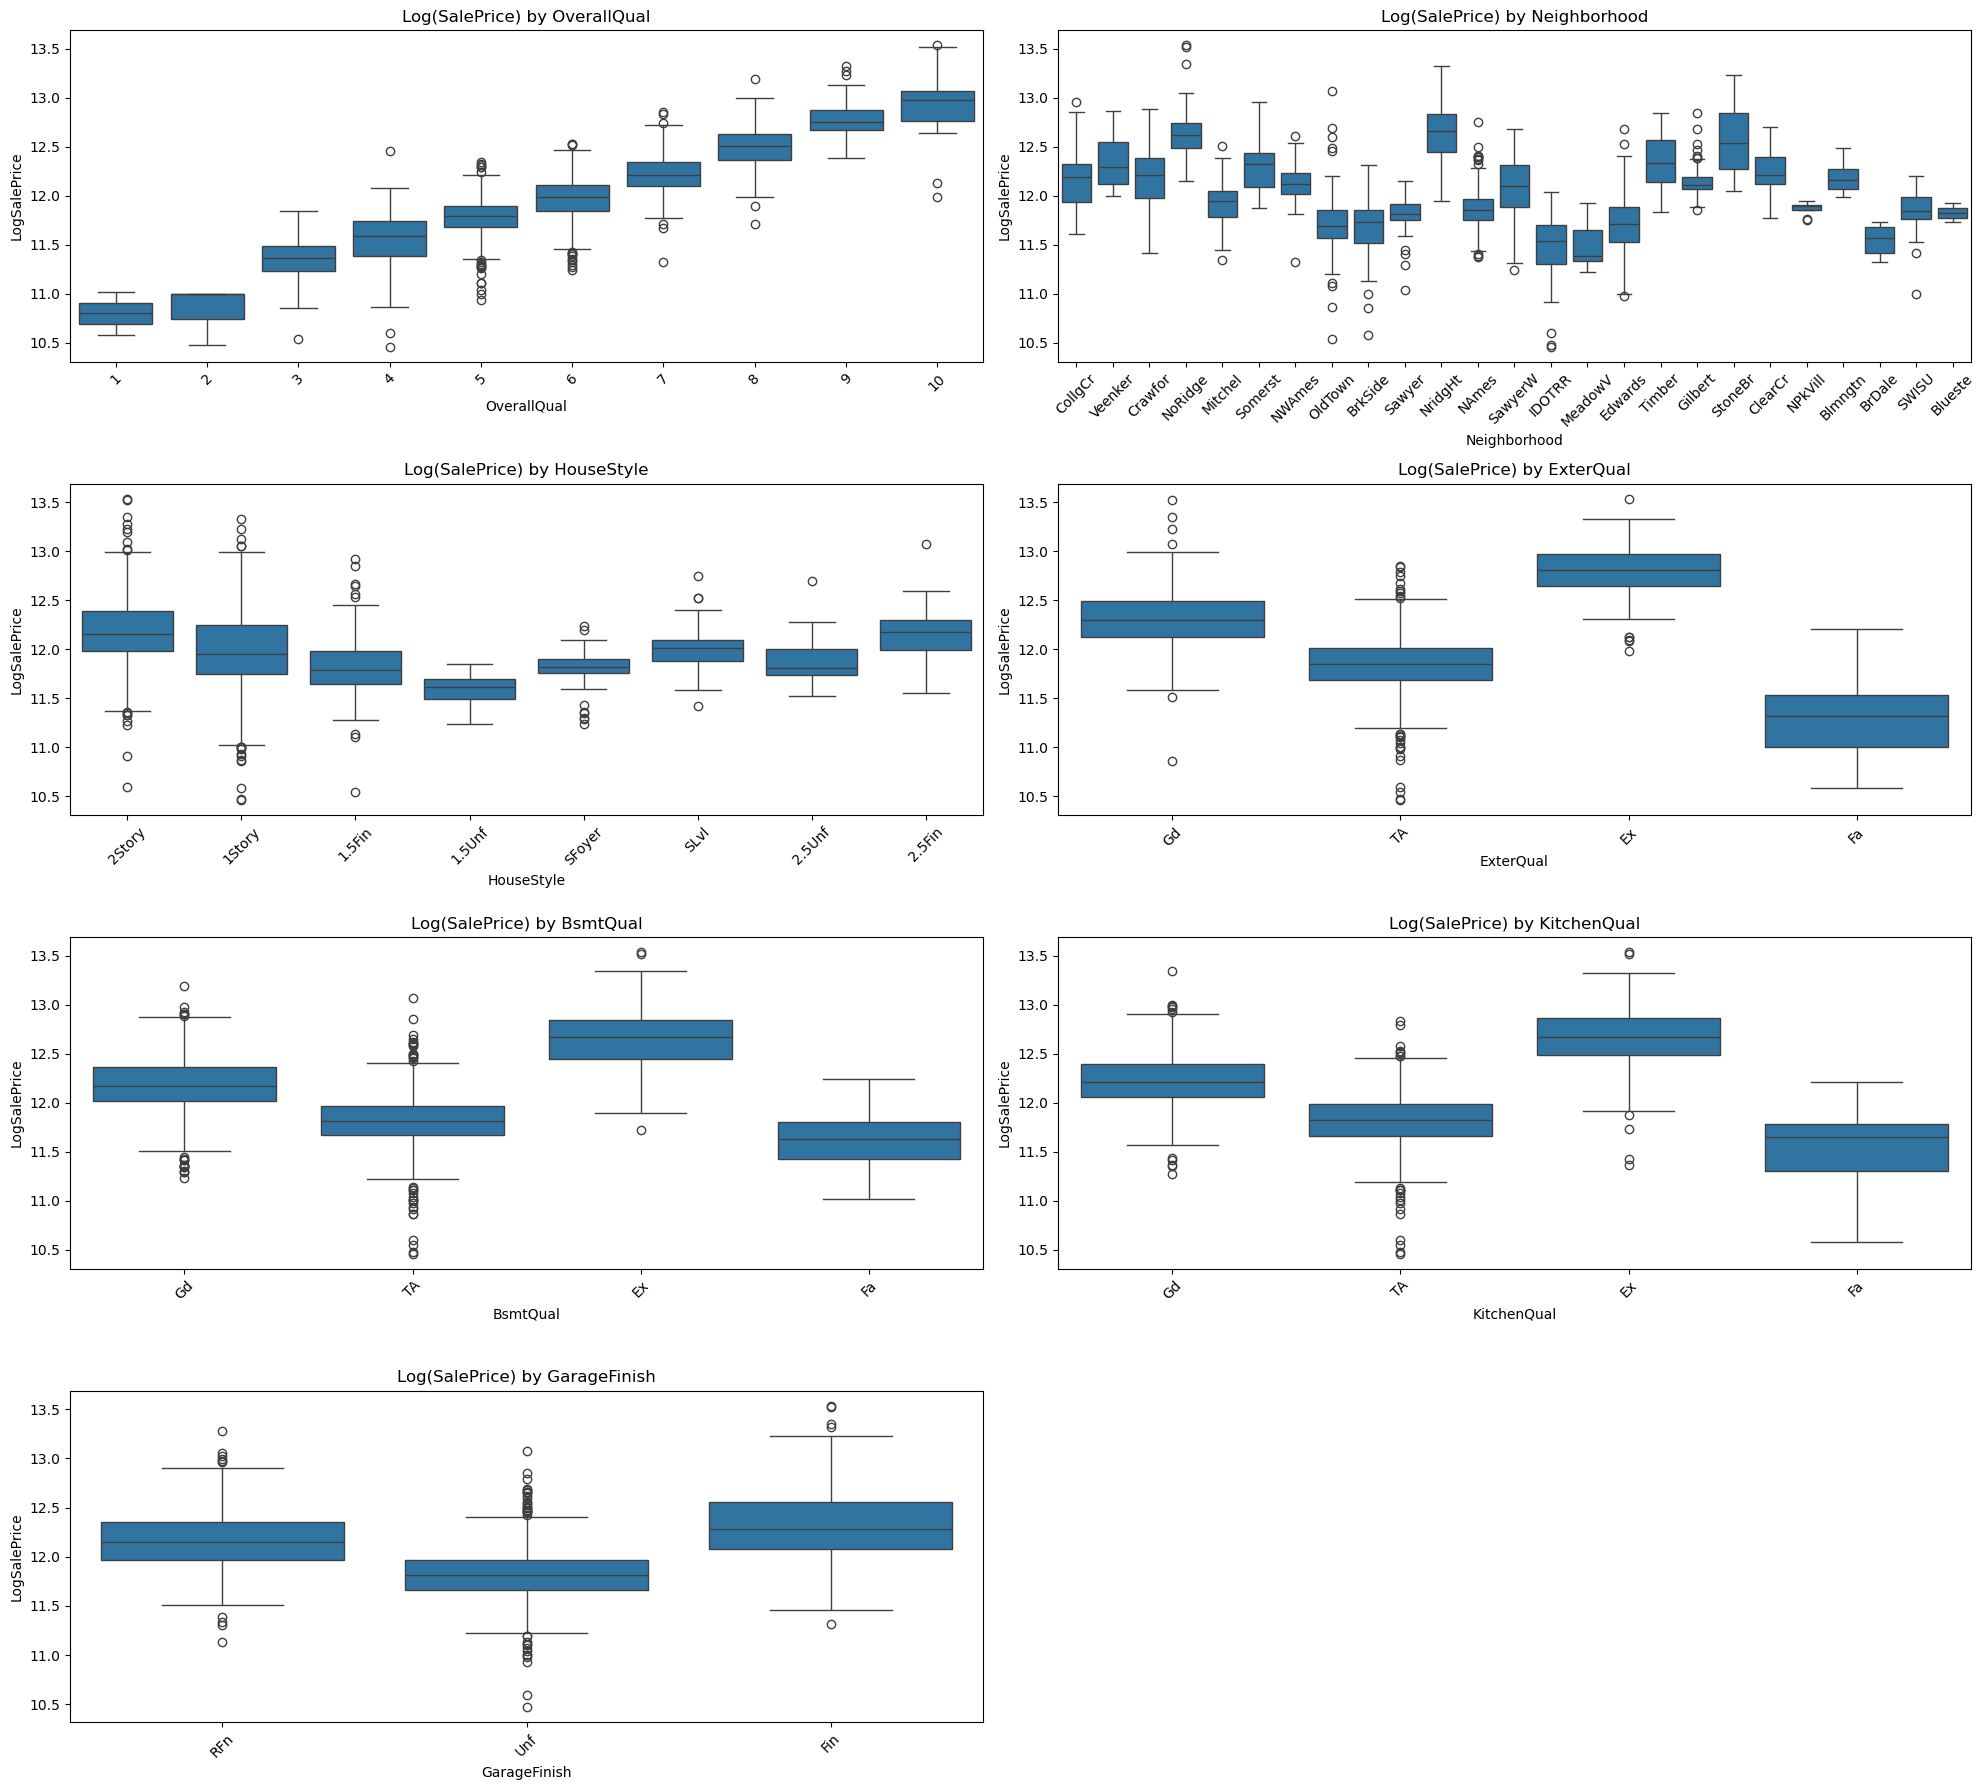

In [24]:
cat_features = ['OverallQual', 'Neighborhood', 'HouseStyle', 'ExterQual',
                'BsmtQual', 'KitchenQual', 'GarageFinish']

plt.figure(figsize=(20, 18))

for i, feature in enumerate(cat_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=data, x=feature, y='LogSalePrice')
    plt.xticks(rotation=45)
    plt.title(f'Log(SalePrice) by {feature}')

plt.tight_layout()
plt.show()

# *Кодирование порядковых признаков*

In [25]:
ordinal_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0
}

ordinal_features = ['ExterQual', 'BsmtQual', 'KitchenQual', 'HeatingQC', 'FireplaceQu',
                    'GarageQual', 'GarageCond', 'BsmtCond', 'PoolQC']

for feature in ordinal_features:
    if feature in data.columns:
        data[feature] = data[feature].map(ordinal_map)


# One-Hot Encoding номинальных признаков

In [26]:
nominal_features = data.select_dtypes(include=['object']).columns.tolist()

# Исключим уже закодированные ordinal признаки
nominal_features = [col for col in nominal_features if col not in ordinal_features]

# One-Hot Encoding
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)


In [28]:
data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0          4  ...           False           False   
1          1976         0.0          3  ...           False           False   
2          2002       162.0          4  ...           False           False   
3          1970         0.0          3  ...           False           False   
4          2000       350.0          4  ...           False           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                  False   
4         False         False         True                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 226 columns]

# Умный анализ признаков:

Категориальные признаки: []

--- Уникальные значения категориальных признаков ---


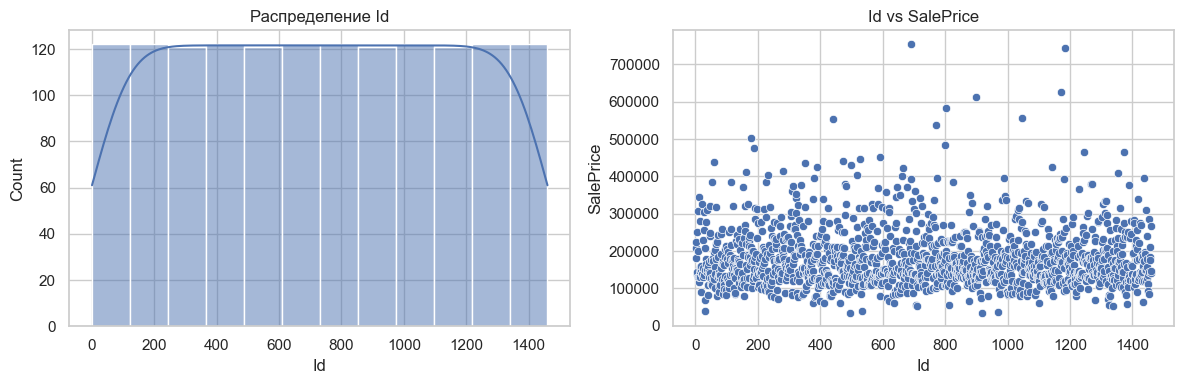

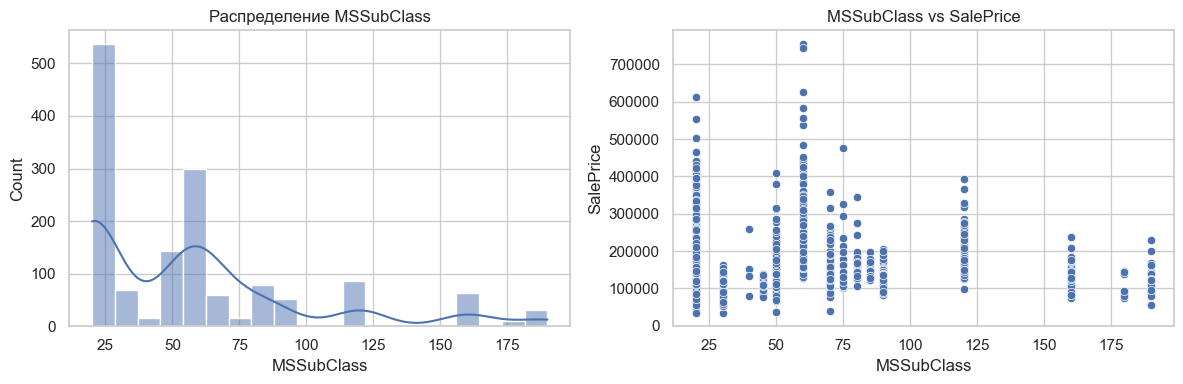

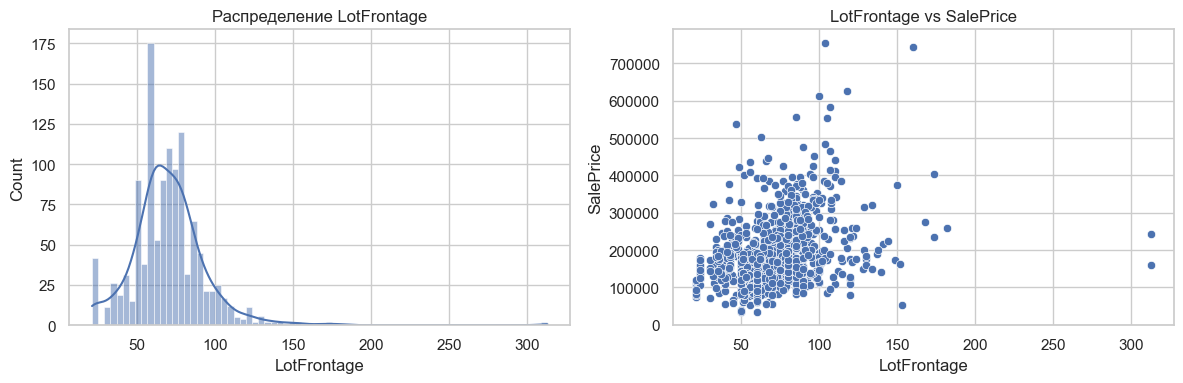

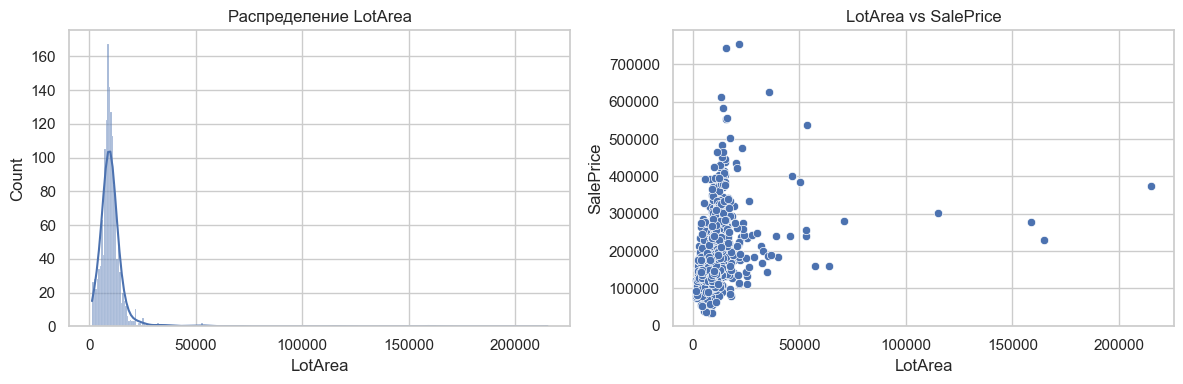

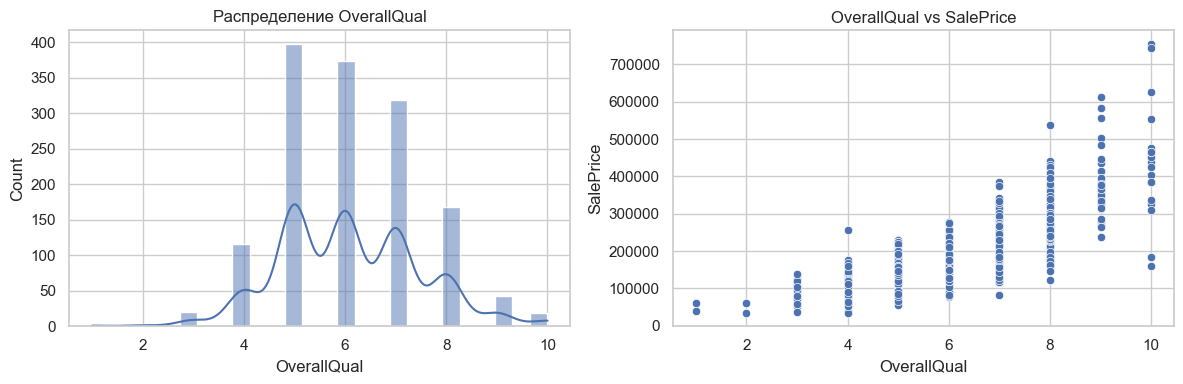

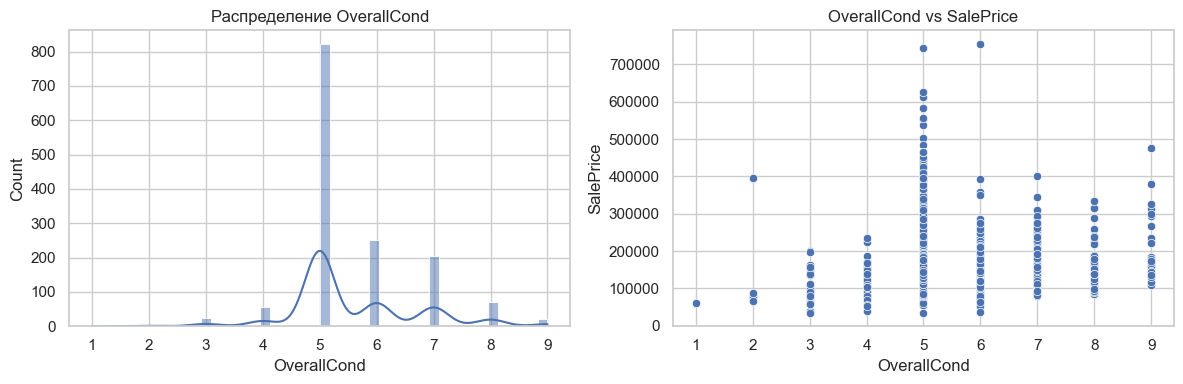

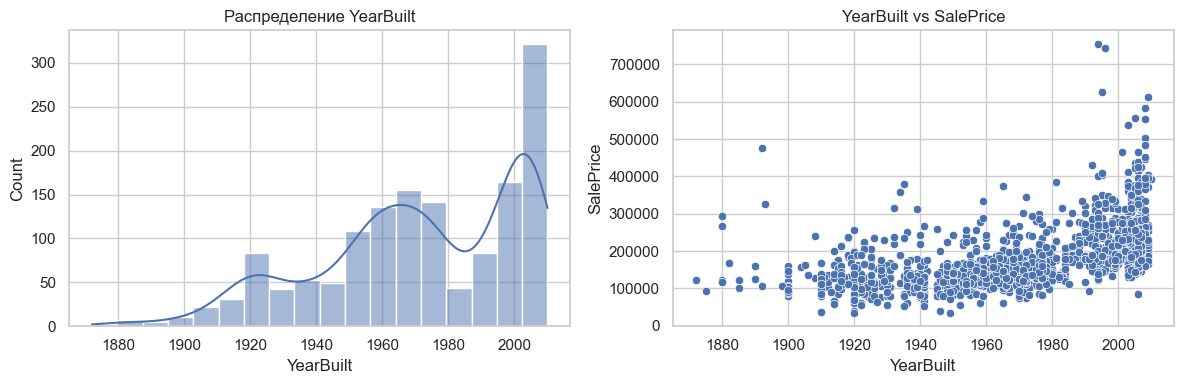

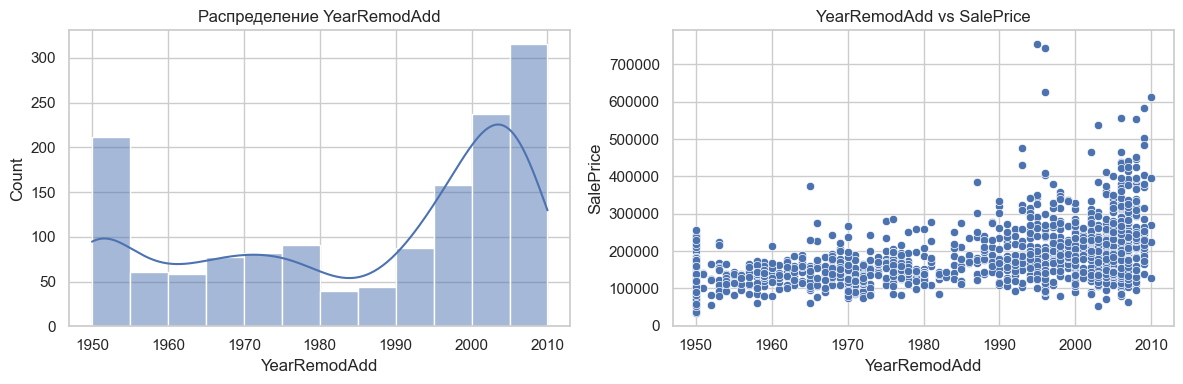

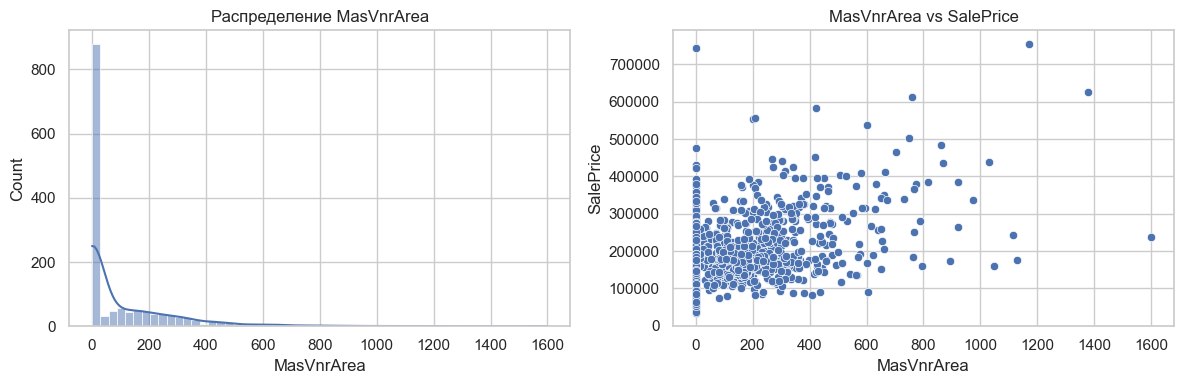

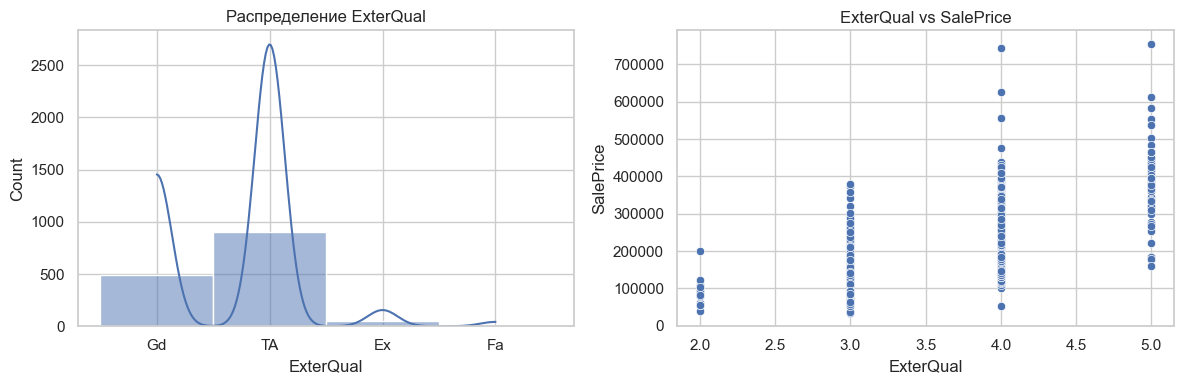

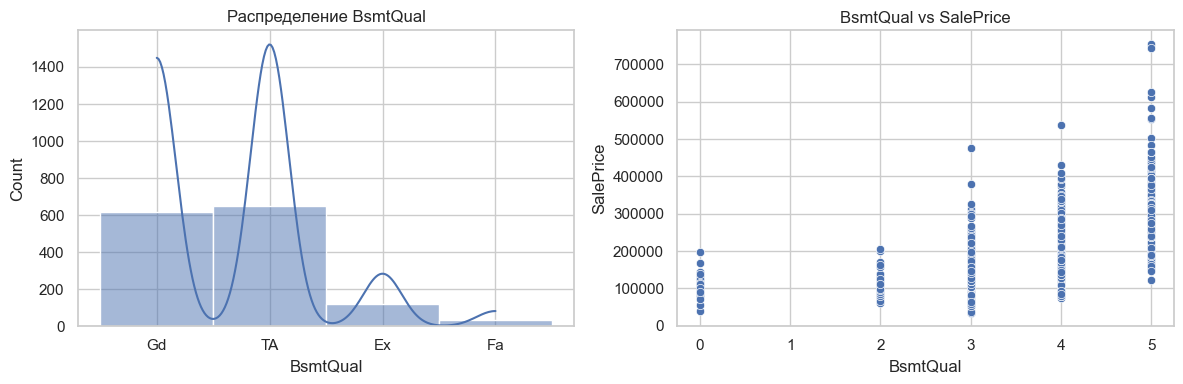

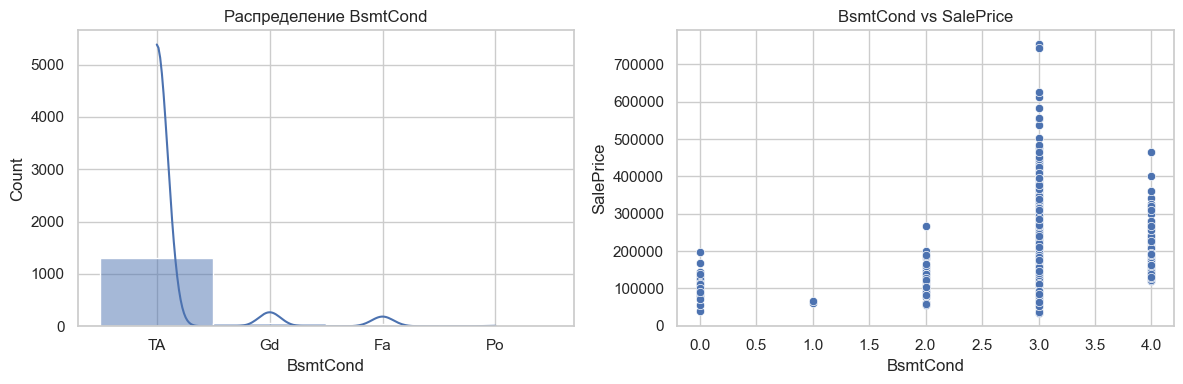

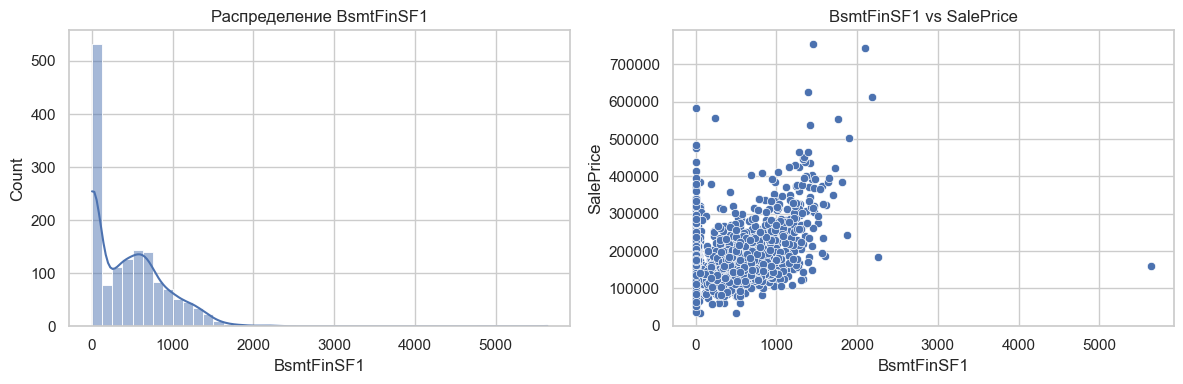

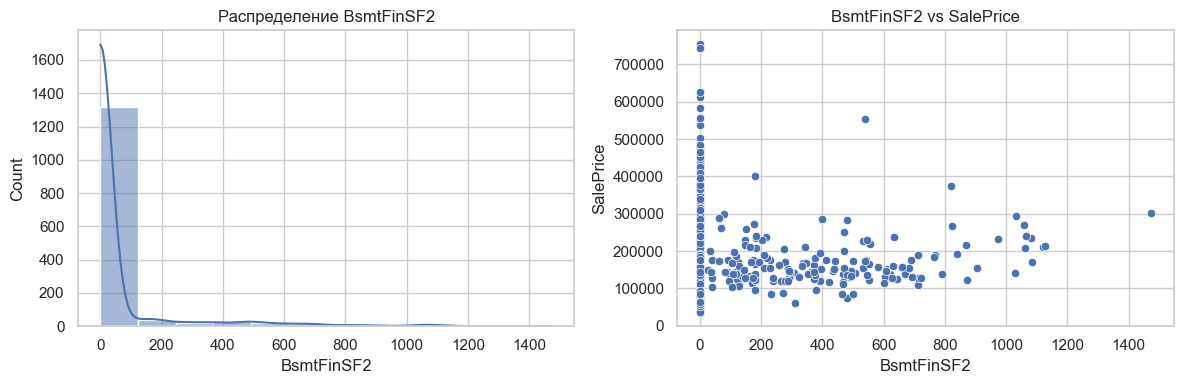

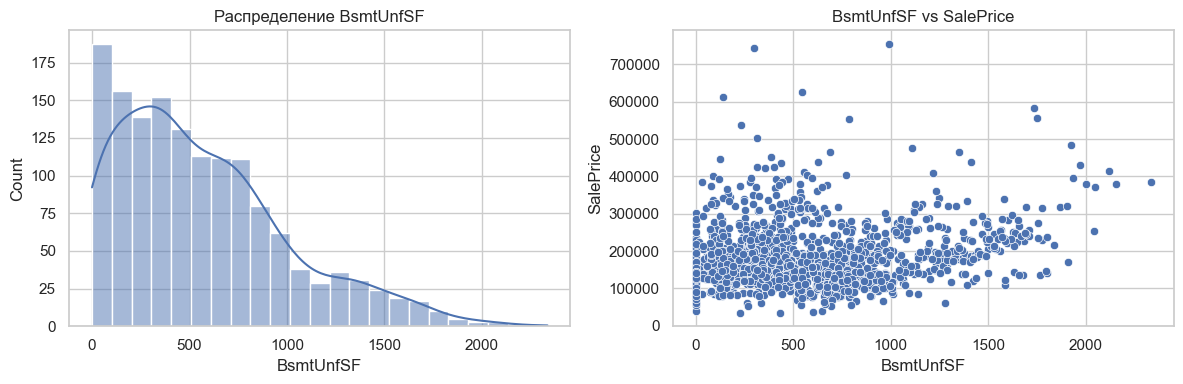

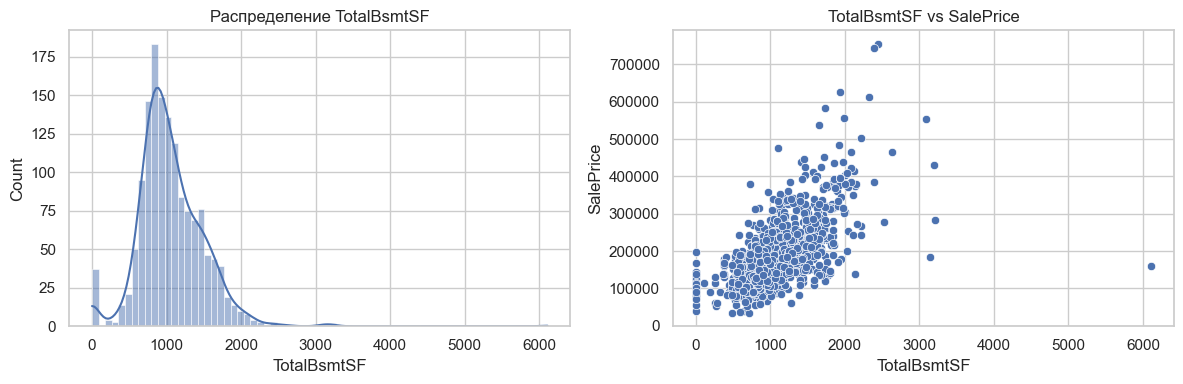

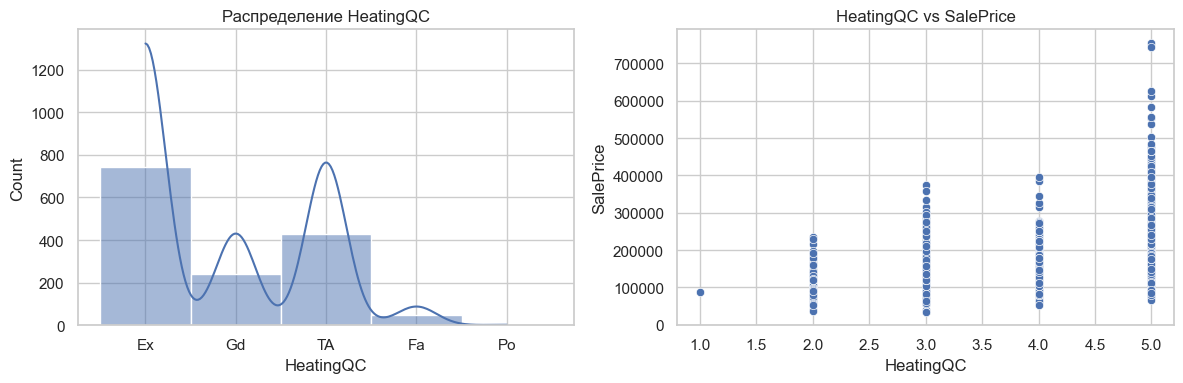

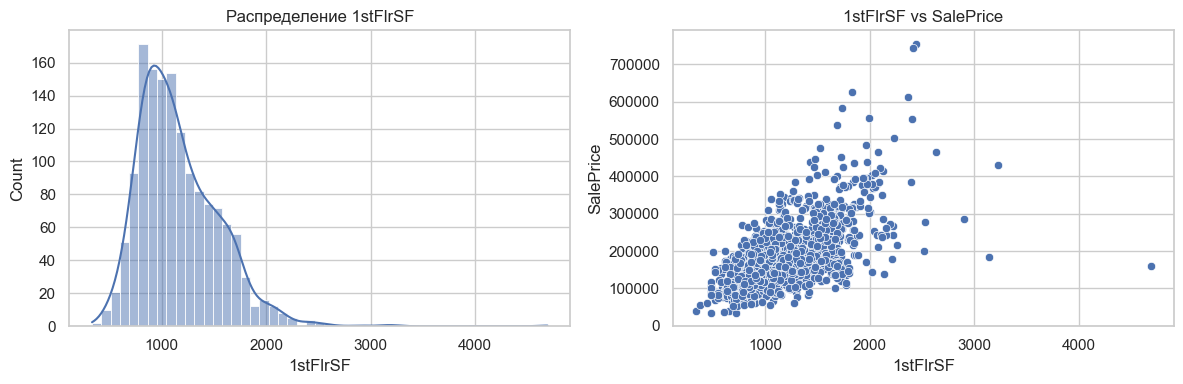

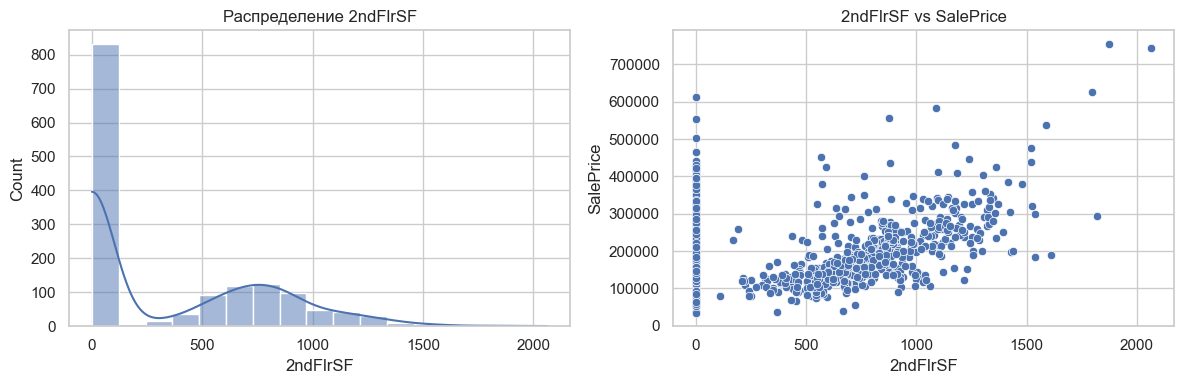

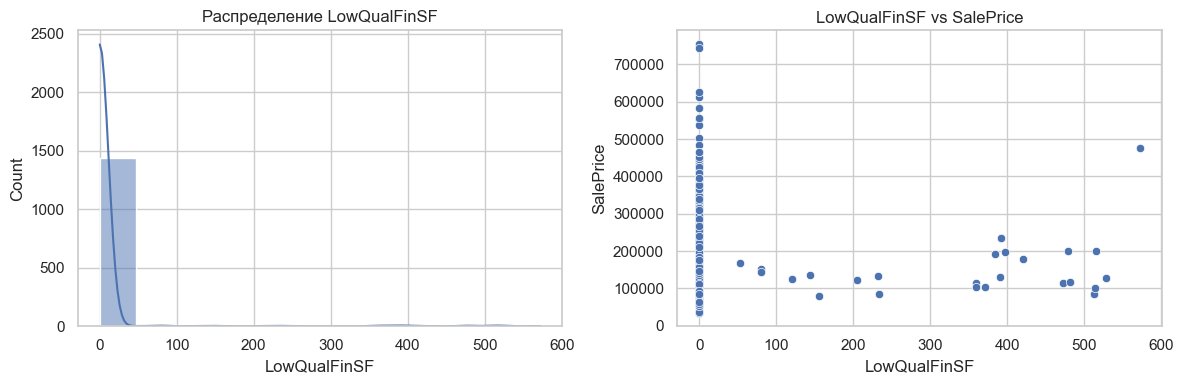

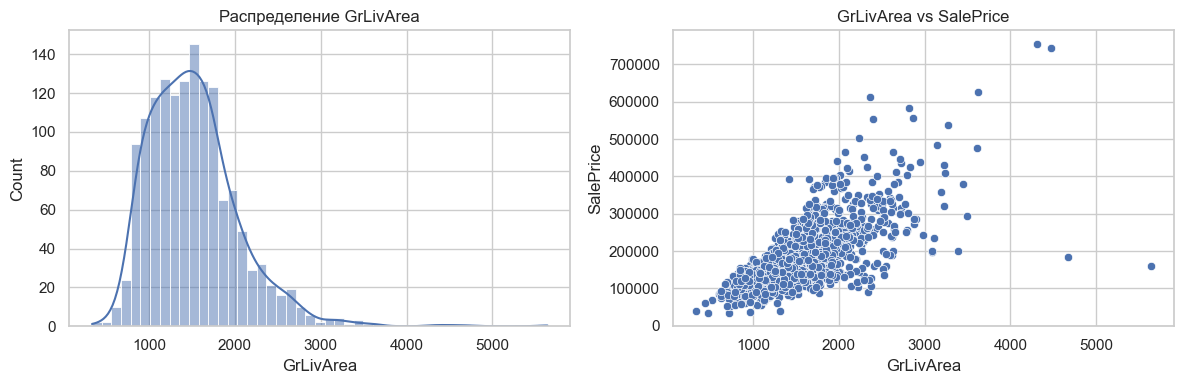

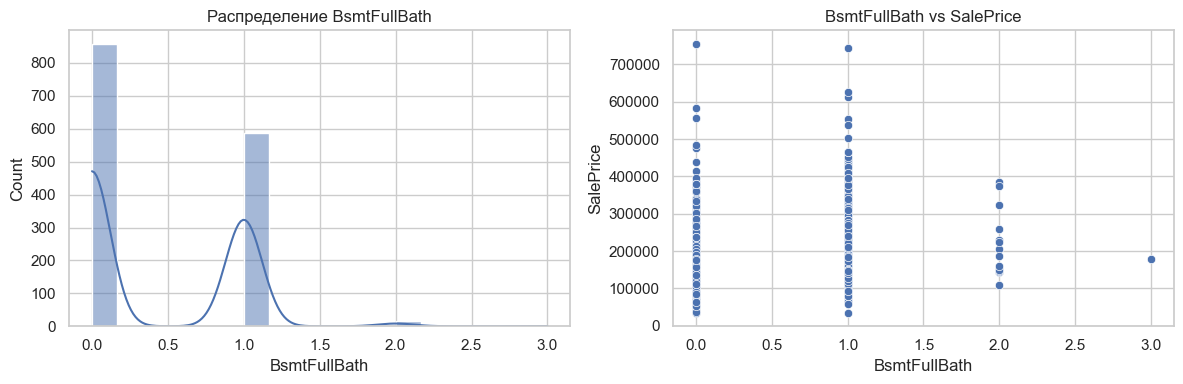

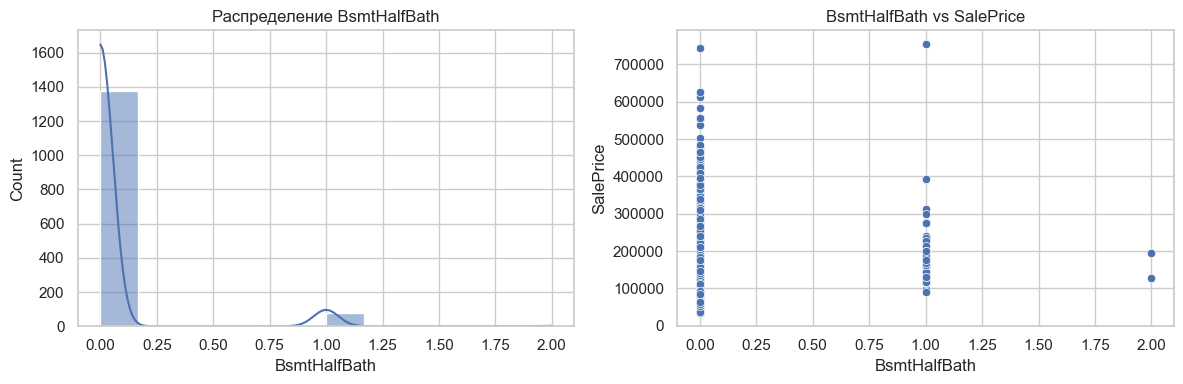

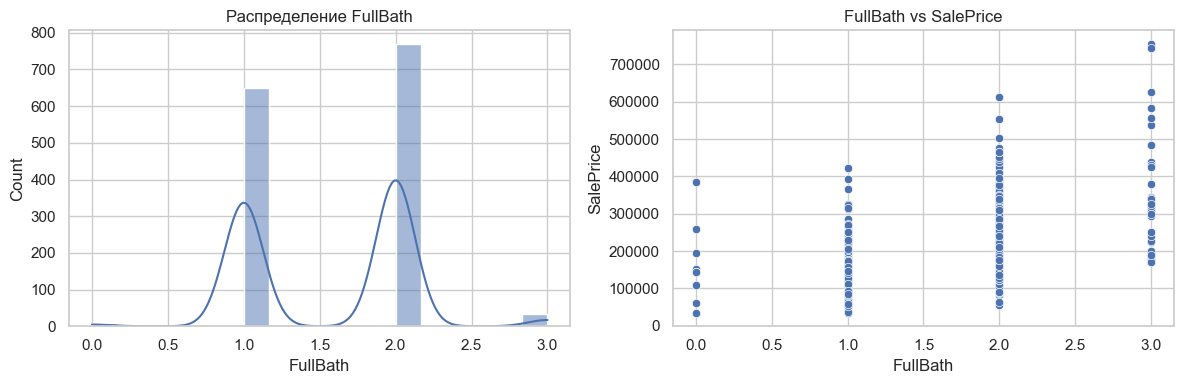

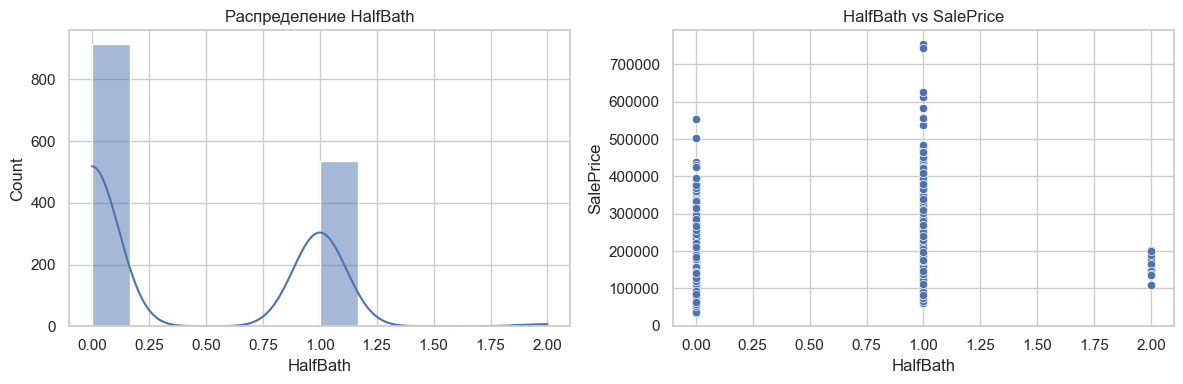

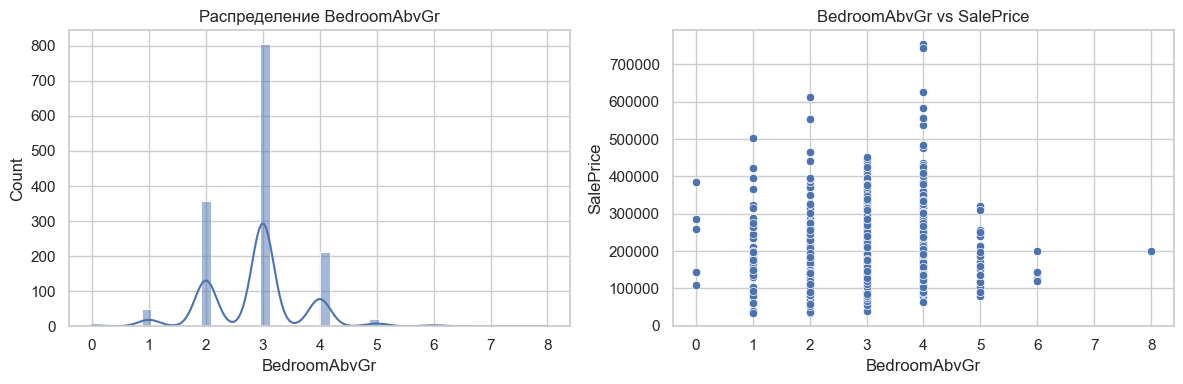

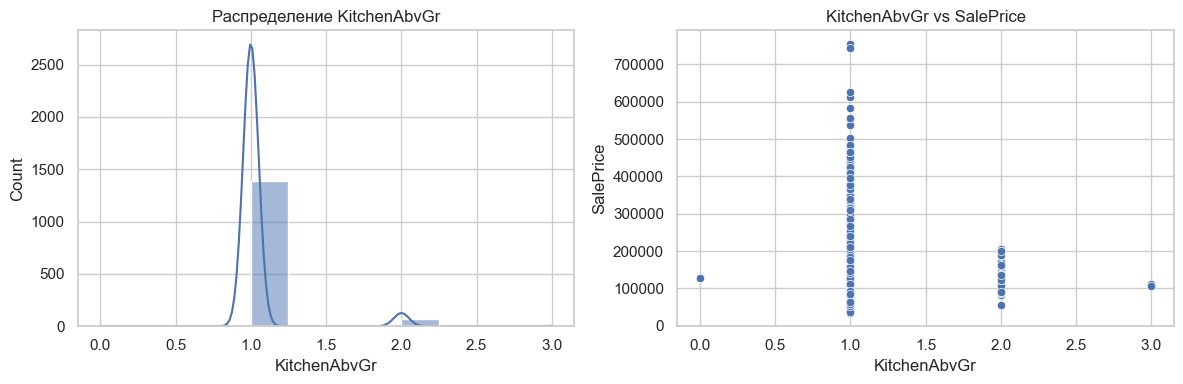

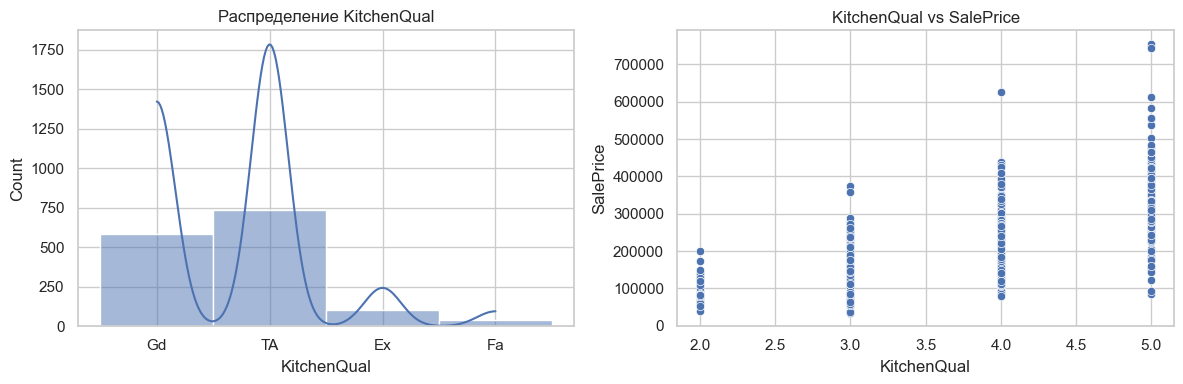

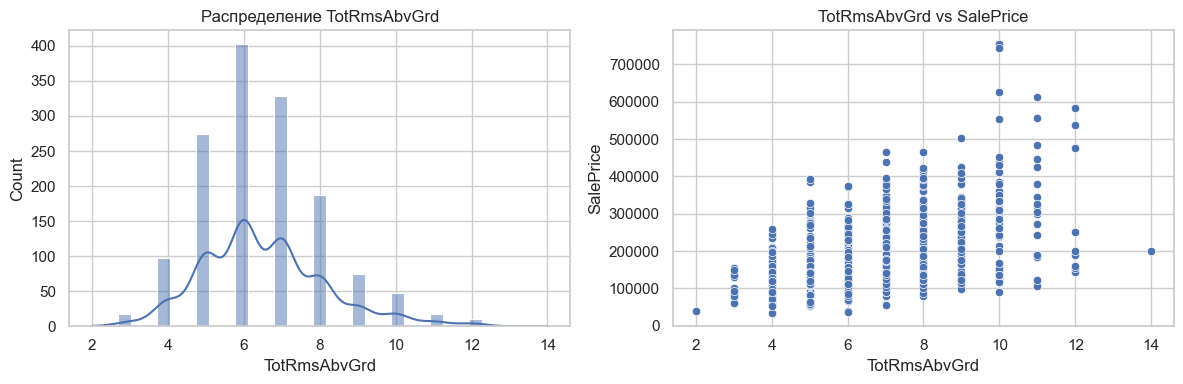

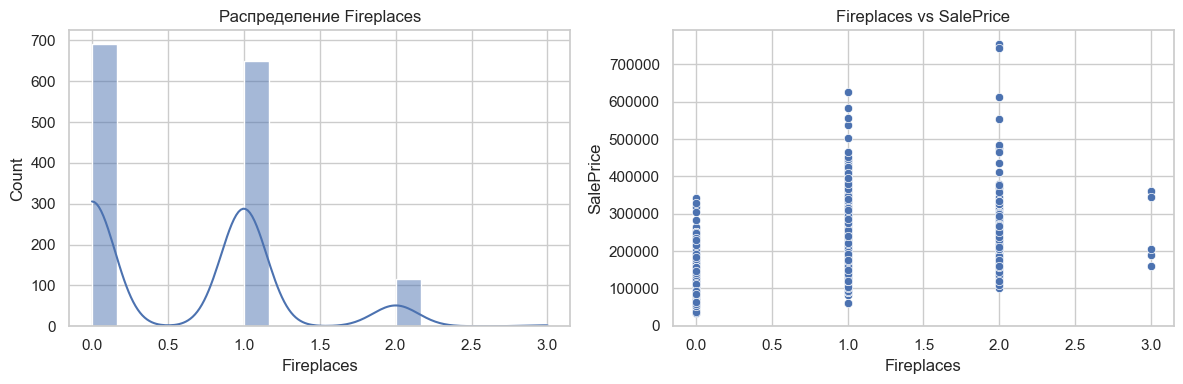

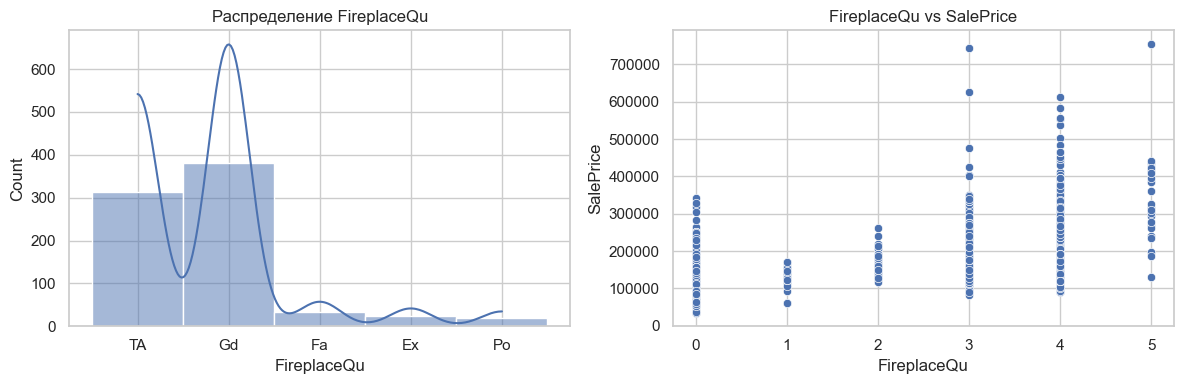

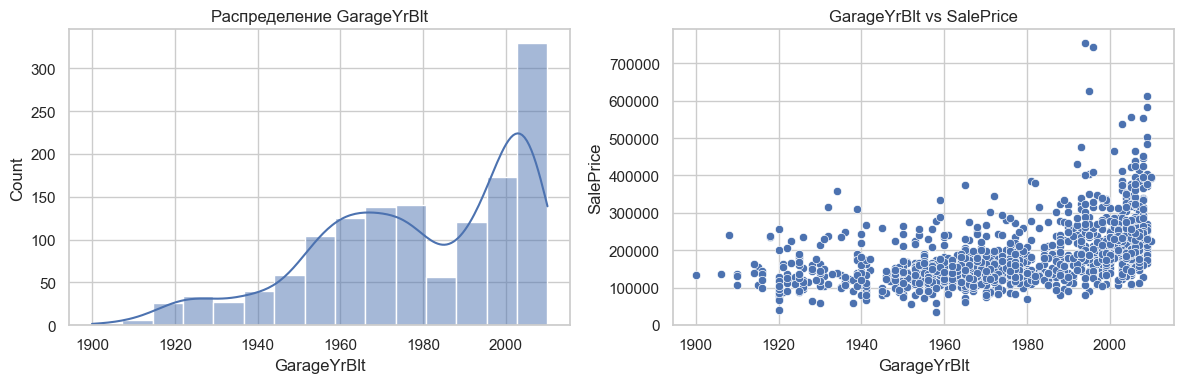

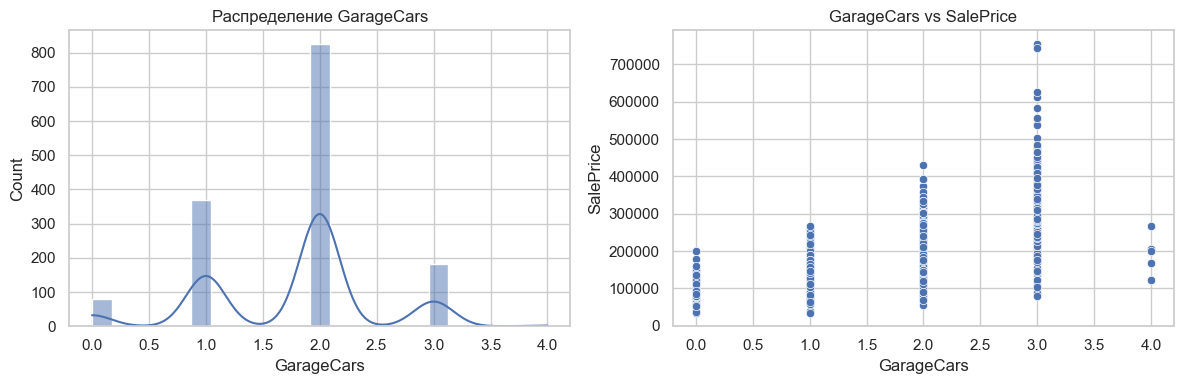

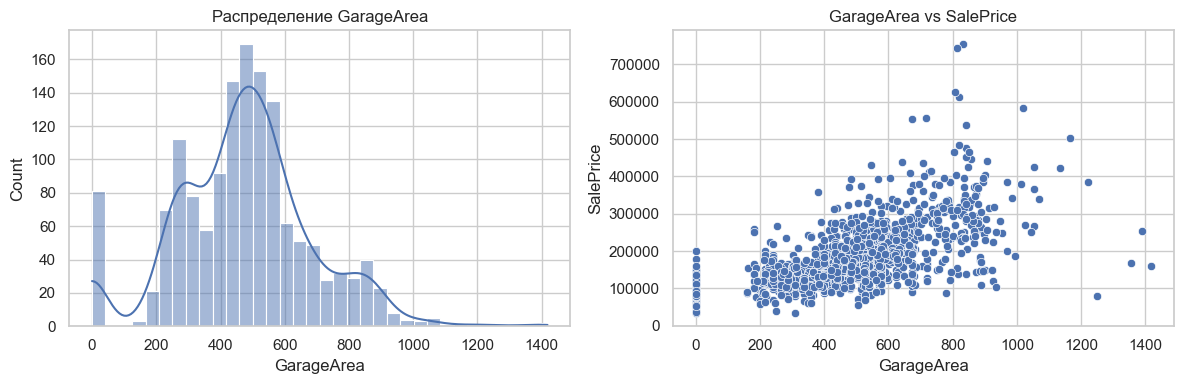

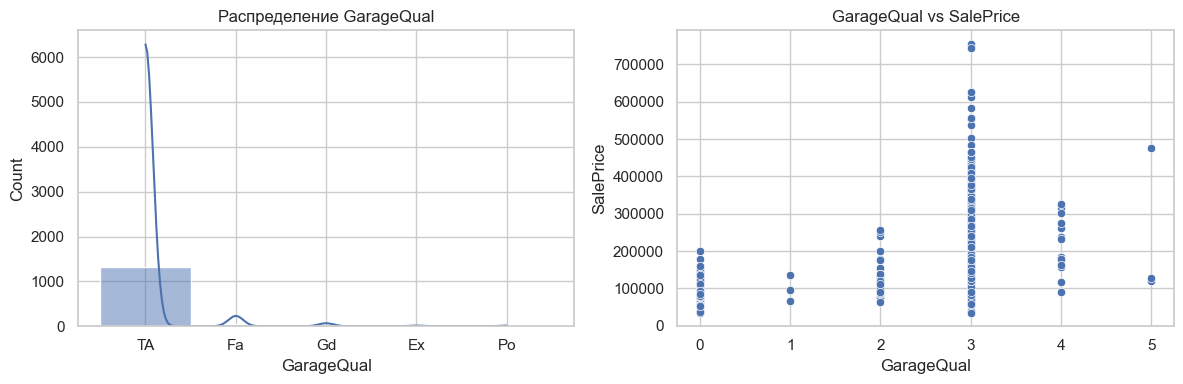

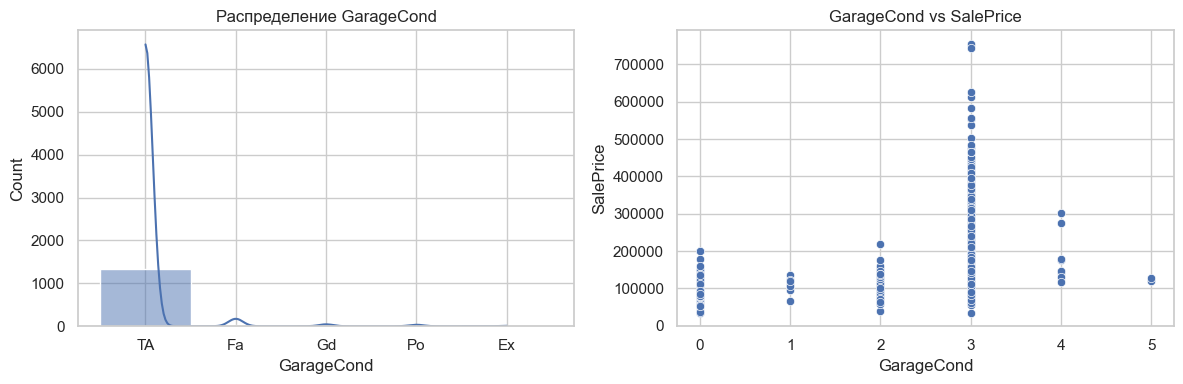

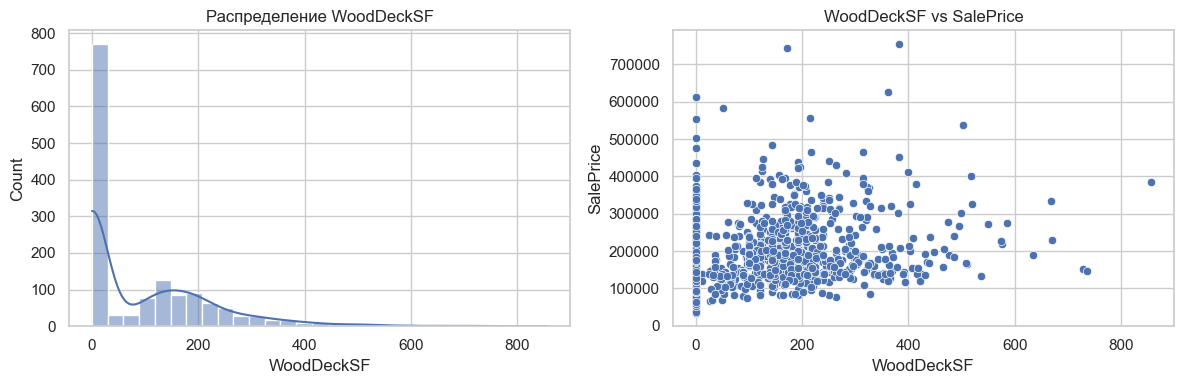

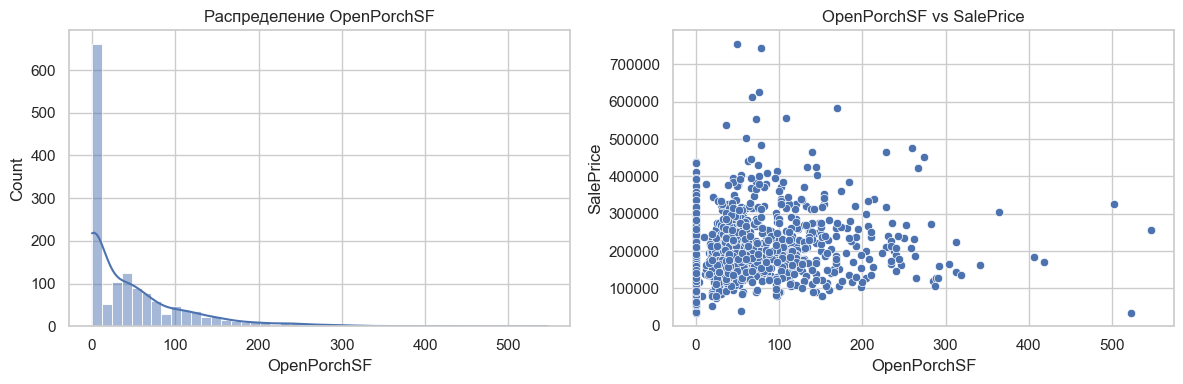

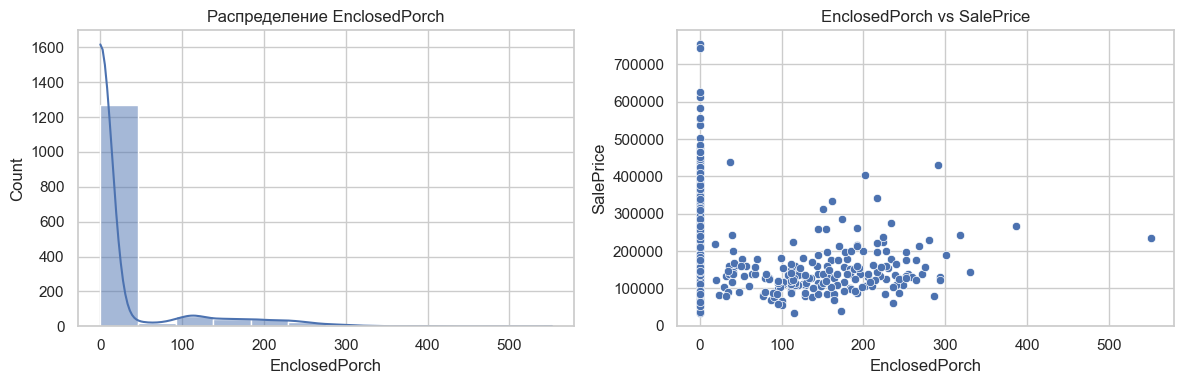

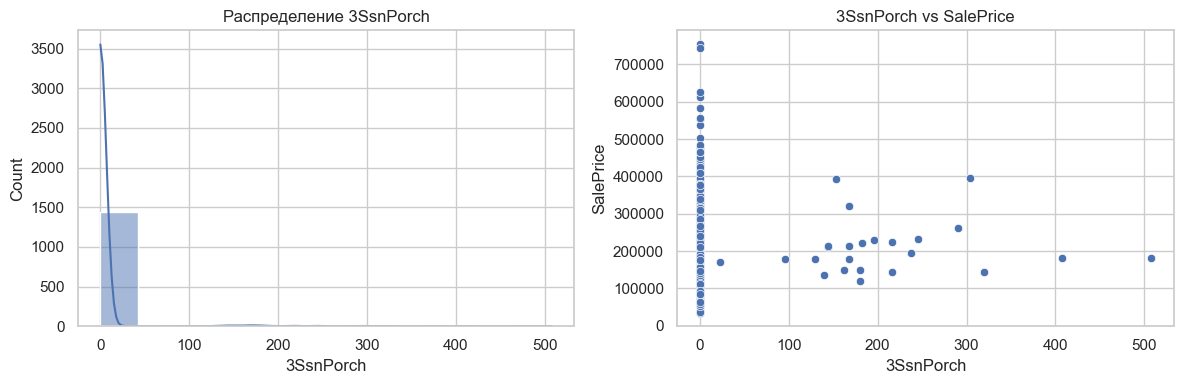

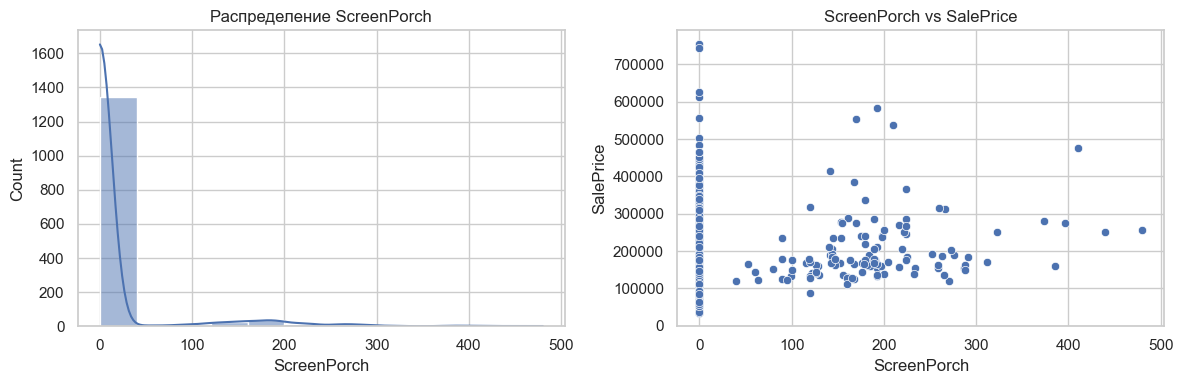

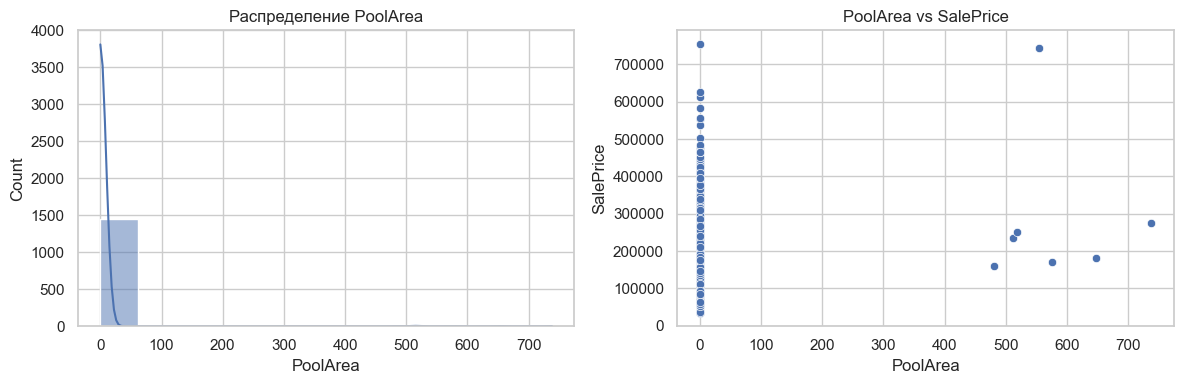

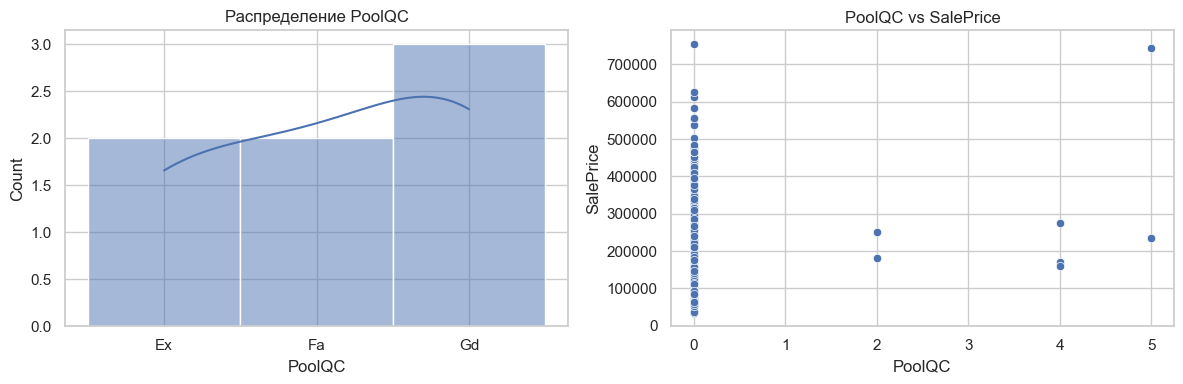

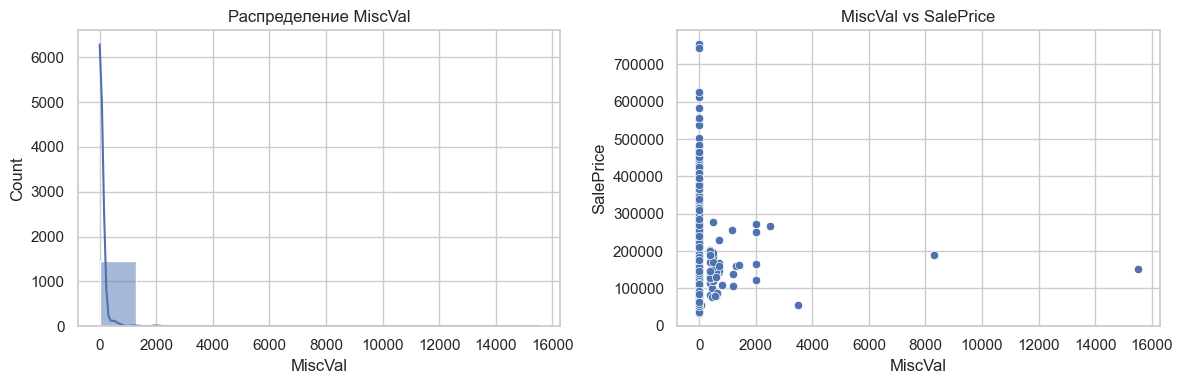

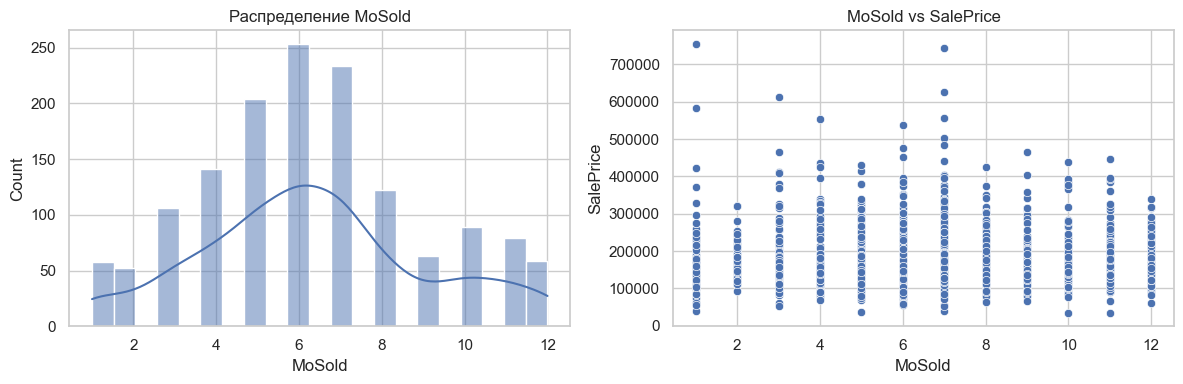

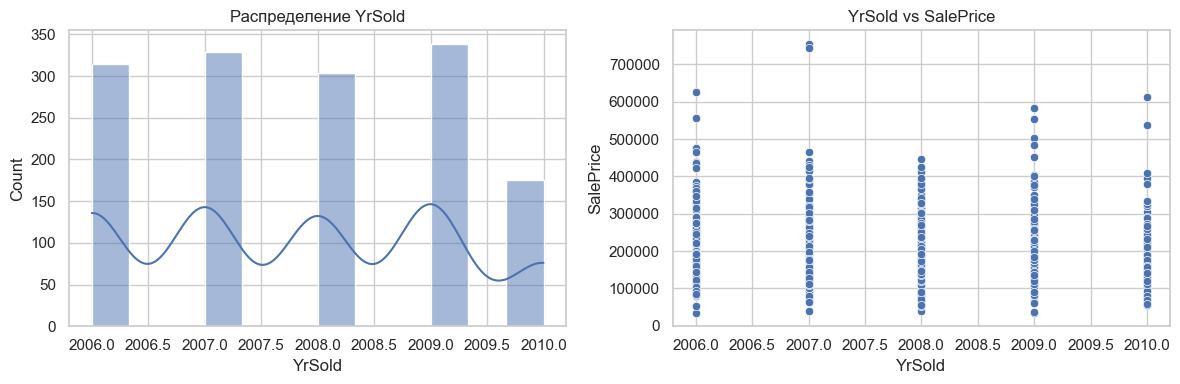

KeyError: 'LogSalePrice'

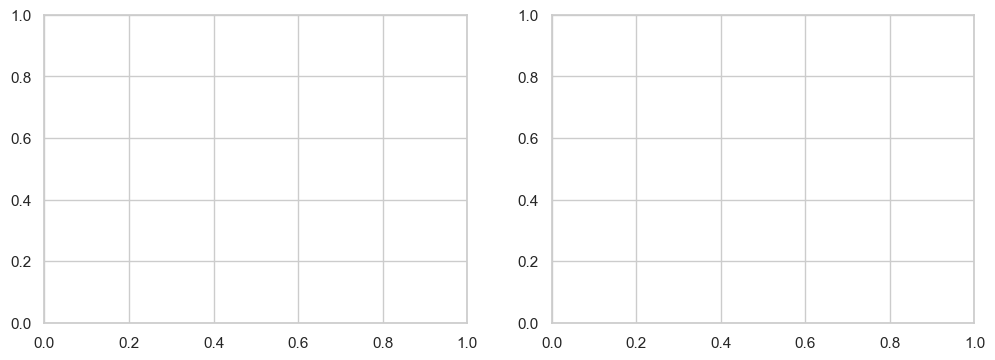

In [29]:
# Настройки
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Категориальные признаки
cat_cols = data.select_dtypes(include='object').columns
print("Категориальные признаки:", list(cat_cols))

# Покажем число уникальных значений
print("\n--- Уникальные значения категориальных признаков ---")
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} уникальных значений")

# Boxplot для категориальных с <20 уникальными
for col in cat_cols:
    if data[col].nunique() < 20:
        plt.figure(figsize=(10, 4))
        sns.boxplot(data=data, x=col, y='SalePrice')
        plt.xticks(rotation=45)
        plt.title(f"{col} vs SalePrice")
        plt.tight_layout()
        plt.show()

# Числовые признаки
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')

# Гистограмма + scatterplot для каждого числового признака
for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col].dropna(), kde=True, ax=axs[0])
    axs[0].set_title(f"Распределение {col}")
    
    sns.scatterplot(x=data[col], y=data['SalePrice'], ax=axs[1])
    axs[1].set_title(f"{col} vs SalePrice")
    
    plt.tight_layout()
    plt.show()

# Корреляция с SalePrice
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Корреляция признаков с SalePrice")
plt.show()

# Признаки с 1 уникальным значением
low_var = [col for col in df.columns if df[col].nunique() == 1]
print("\n--- Признаки с одной уникальной категорией (можно удалить):", low_var)


# Таблица анализа признаков

In [30]:
# Создаём сводную таблицу по каждому признаку
feature_summary = []

for col in data.columns:
    dtype = data[col].dtype
    n_missing = data[col].isnull().sum()
    n_unique = data[col].nunique()
    
    if dtype == 'object':
        corr = None  # нельзя посчитать напрямую
    else:
        if col != 'SalePrice':
            corr = data[[col, 'SalePrice']].corr().iloc[0, 1]
        else:
            corr = 1.0

    feature_summary.append({
        'feature': col,
        'dtype': dtype,
        'missing': n_missing,
        'n_unique': n_unique,
        'corr_with_SalePrice': corr
    })

feature_summary_data = pd.DataFrame(feature_summary)
feature_summary_data = feature_summary_data.sort_values(by='corr_with_SalePrice', ascending=False)

# Показываем
print("\n--- Сводная таблица по признакам ---")
display(feature_summary_data)



--- Сводная таблица по признакам ---


feature    dtype  missing  n_unique  corr_with_SalePrice
46           SalePrice    int64        0       663             1.000000
47        LogSalePrice  float64        0       663             0.948374
4          OverallQual    int64        0        10             0.790982
20           GrLivArea    int64        0       861             0.708624
9            ExterQual    int64        0         4             0.682639
..                 ...      ...      ...       ...                  ...
56        LotShape_Reg     bool        0         2            -0.267672
51         MSZoning_RM     bool        0         2            -0.288065
164  Foundation_CBlock     bool        0         2            -0.343263
202  GarageType_Detchd     bool        0         2            -0.354141
204   GarageFinish_Unf     bool        0         2            -0.410608

[226 rows x 5 columns]

### как читать таблицу:
- Пропуски (missing):

20% — либо удалять, либо аккуратно заполнять.

- Уникальные значения (n_unique):

1 — бесполезны, можно сразу удалять.

2-10 — хорошие кандидаты на one-hot.

>10 — подумать о target encoding / frequency encoding.

- Корреляция (corr_with_SalePrice):

> 0.5 — сильная связь, важные признаки.

0.2–0.5 — умеренно полезны.

< 0.2 — слабая корреляция, но не всегда бесполезны (можно дополнительно смотреть визуализации).

In [33]:
feature_summary_data = pd.DataFrame([
    {
        'feature': col,
        'dtype': data[col].dtype,
        'missing': data[col].isnull().sum(),
        'n_unique': data[col].nunique(),
        'corr_with_SalePrice': None if data[col].dtype == 'object' or col == 'SalePrice' else data[[col, 'SalePrice']].corr().iloc[0, 1],
        'drop_recommendation':
            'Drop - constant' if data[col].nunique() == 1 else
            'Drop - too many missing' if data[col].isnull().sum() / len(data) > 0.4 else
            'Keep - high correlation' if data[col].dtype != 'object' and col != 'SalePrice' and data[[col, 'SalePrice']].corr().iloc[0, 1] > 0.5 else
            'Consider'  # всё остальное
    }
    for col in data.columns
]).sort_values(by='corr_with_SalePrice', ascending=False)


In [34]:
display(feature_summary_data)

feature    dtype  missing  n_unique  corr_with_SalePrice  \
47        LogSalePrice  float64        0       663             0.948374   
4          OverallQual    int64        0        10             0.790982   
20           GrLivArea    int64        0       861             0.708624   
9            ExterQual    int64        0         4             0.682639   
27         KitchenQual    int64        0         4             0.659600   
..                 ...      ...      ...       ...                  ...   
51         MSZoning_RM     bool        0         2            -0.288065   
164  Foundation_CBlock     bool        0         2            -0.343263   
202  GarageType_Detchd     bool        0         2            -0.354141   
204   GarageFinish_Unf     bool        0         2            -0.410608   
46           SalePrice    int64        0       663                  NaN   

         drop_recommendation  
47   Keep - high correlation  
4    Keep - high correlation  
20   Keep - high correlation  
9    Keep - high correlation  
27   Keep - high correlation  
..                       ...  
51                  Consider  
164                 Consider  
202                 Consider  
204                 Consider  
46                  Consider  

[226 rows x 6 columns]

### Инструкции рекомендаций:

| Условие            | Рекомендация         |
| ------------------ | -------------------- |
| `n_unique == 1`    | Drop — бесполезный   |
| `> 40% пропусков`  | Drop — слишком много |
| `корреляция > 0.5` | Keep — сильно влияет |
| всё остальное      | Consider — надо думать   |
